# Lecture 3 - Parsing Dates

Giúp Python nhận diện ngày tháng dưới dạng ngày, tháng và năm.

Trong notebook này, chúng ta sẽ làm việc với ngày tháng.

Hãy bắt đầu thôi!

## Thiết lập môi trường của chúng ta

Điều đầu tiên chúng ta cần làm là tải các thư viện và bộ dữ liệu mà chúng ta sẽ sử dụng. Chúng ta sẽ làm việc với một bộ dữ liệu chứa thông tin về các vụ sạt lở đất xảy ra từ năm 2007 đến 2016. Trong [**bài tập tiếp theo**](https://www.kaggle.com/kernels/fork/10824403), bạn sẽ áp dụng các kỹ năng mới của mình vào một bộ dữ liệu về các trận động đất trên toàn cầu.


In [10]:
# Các module chúng ta sẽ sử dụng
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# Đọc dữ liệu của chúng ta
landslides = pd.read_csv("catalog.csv")

# Đặt seed để đảm bảo tính tái tạo
np.random.seed(0)

Bây giờ chúng ta đã sẵn sàng để xem các ngày tháng!

## Kiểm tra kiểu dữ liệu của cột ngày

Chúng ta bắt đầu bằng cách xem xét năm dòng đầu tiên của dữ liệu.


In [11]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


Chúng ta sẽ làm việc với cột "date" từ dataframe `landslides`. Hãy chắc chắn rằng nó thực sự chứa các giá trị ngày tháng.

In [12]:
# In ra vài dòng đầu tiên của cột ngày
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


Đúng vậy, đó là các ngày tháng! Nhưng chỉ vì tôi, một con người, có thể nhận ra đây là các ngày tháng không có nghĩa là Python cũng biết chúng là ngày tháng. Lưu ý rằng ở dưới cùng của kết quả từ `head()`, bạn có thể thấy rằng kiểu dữ liệu của cột này là "object".

> Pandas sử dụng kiểu dữ liệu "object" để lưu trữ nhiều loại kiểu dữ liệu khác nhau, nhưng thường thì khi bạn thấy một cột có kiểu dữ liệu "object", nó sẽ chứa các chuỗi (strings).

Nếu bạn kiểm tra tài liệu kiểu dữ liệu pandas [tại đây](http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes), bạn sẽ nhận thấy rằng cũng có một kiểu dữ liệu cụ thể là `datetime64`. Vì kiểu dữ liệu của cột này là "object" thay vì `datetime64`, chúng ta có thể biết rằng Python không nhận ra rằng cột này chứa các giá trị ngày tháng.

Chúng ta cũng có thể chỉ kiểm tra kiểu dữ liệu của một cột mà không cần in ra vài dòng đầu tiên:

In [13]:
# Kiểm tra kiểu dữ liệu của cột ngày
landslides['date'].dtype

dtype('O')

Bạn có thể cần kiểm tra tài liệu [numpy](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.dtype.kind.html#numpy.dtype.kind) để đối chiếu mã chữ với kiểu dữ liệu của đối tượng. "O" là mã cho "object", vì vậy chúng ta có thể thấy rằng hai phương pháp này cung cấp cho chúng ta cùng một thông tin.

## Chuyển đổi cột ngày của chúng ta thành kiểu datetime

Bây giờ chúng ta biết rằng cột ngày của mình không được nhận diện là ngày tháng, đã đến lúc chuyển đổi nó sao cho nó *được* nhận diện là ngày tháng. Điều này được gọi là "phân tích ngày tháng" vì chúng ta đang nhận vào một chuỗi và xác định các thành phần của nó.

Chúng ta có thể xác định định dạng của các ngày tháng trong dữ liệu bằng một hướng dẫn gọi là ["strftime directive", bạn có thể tìm thêm thông tin tại liên kết này](http://strftime.org/). Ý tưởng cơ bản là bạn cần chỉ ra phần nào của ngày tháng ở đâu và dấu câu nào ở giữa chúng. Có [nhiều phần có thể có của một ngày tháng](http://strftime.org/), nhưng những phần phổ biến nhất là `%d` cho ngày, `%m` cho tháng, `%y` cho năm hai chữ số và `%Y` cho năm bốn chữ số.

Một số ví dụ:

 * 1/17/07 có định dạng "%m/%d/%y"
 * 17-1-2007 có định dạng "%d-%m-%Y"
 
Nhìn lại phần đầu của cột "date" trong bộ dữ liệu landslides, chúng ta có thể thấy rằng nó có định dạng "tháng/ngày/năm hai chữ số", vì vậy chúng ta có thể sử dụng cú pháp giống như ví dụ đầu tiên để phân tích các ngày tháng của mình:

In [14]:
# Tạo một cột mới, date_parsed, với các ngày tháng đã được phân tích
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

Bây giờ, khi tôi kiểm tra vài dòng đầu tiên của cột mới, tôi có thể thấy rằng kiểu dữ liệu là `datetime64`. Tôi cũng có thể thấy rằng các ngày tháng của tôi đã được sắp xếp lại một chút sao cho phù hợp với thứ tự mặc định của các đối tượng ngày tháng (năm-tháng-ngày).

In [15]:
# In ra vài dòng đầu tiên
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

Bây giờ mà các ngày tháng của chúng ta đã được phân tích đúng cách, chúng ta có thể tương tác với chúng theo những cách hữu ích.

___
* **Nếu tôi gặp lỗi với nhiều định dạng ngày tháng khác nhau thì sao?** Trong khi chúng ta đã chỉ định định dạng ngày tháng ở đây, đôi khi bạn sẽ gặp lỗi khi có nhiều định dạng ngày tháng trong cùng một cột. Nếu điều đó xảy ra, bạn có thể yêu cầu pandas thử suy luận định dạng ngày tháng đúng. Bạn có thể làm điều đó như sau:

`landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)`

* **Tại sao không luôn luôn sử dụng `infer_datetime_format = True`?** Có hai lý do chính để không luôn để pandas đoán định dạng thời gian. Lý do đầu tiên là pandas không phải lúc nào cũng có thể xác định đúng định dạng ngày tháng, đặc biệt nếu ai đó đã sáng tạo trong việc nhập liệu. Lý do thứ hai là việc này chậm hơn nhiều so với việc chỉ định chính xác định dạng của ngày tháng.

## Chọn ngày trong tháng

Bây giờ chúng ta đã có một cột ngày tháng đã phân tích, chúng ta có thể trích xuất các thông tin như ngày trong tháng mà vụ sạt lở đất đã xảy ra.

In [16]:
# Lấy ngày trong tháng từ cột date_parsed
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

Nếu chúng ta thử lấy thông tin tương tự từ cột "date" gốc, chúng ta sẽ gặp lỗi: `AttributeError: Can only use .dt accessor with datetimelike values`. Điều này là vì `dt.day` không biết cách xử lý một cột có kiểu dữ liệu "object". Mặc dù dataframe của chúng ta chứa các giá trị ngày tháng, nhưng chúng ta phải phân tích chúng trước khi có thể tương tác với chúng một cách hữu ích.

## Vẽ biểu đồ ngày trong tháng để kiểm tra việc phân tích ngày tháng

Một trong những nguy hiểm lớn nhất khi phân tích ngày tháng là nhầm lẫn giữa tháng và ngày. Hàm `to_datetime()` có các thông báo lỗi rất hữu ích, nhưng không có gì là thừa khi kiểm tra lại rằng các ngày trong tháng mà chúng ta đã trích xuất có hợp lý không.

Để làm điều này, hãy vẽ một biểu đồ histogram về các ngày trong tháng. Chúng ta mong đợi rằng nó sẽ có giá trị trong khoảng từ 1 đến 31 và, vì không có lý do gì để cho rằng các vụ sạt lở đất xảy ra nhiều hơn vào những ngày nhất định trong tháng, phân bố của chúng sẽ tương đối đều. (Với một sự giảm sút vào ngày 31 vì không phải tháng nào cũng có 31 ngày.) Hãy xem liệu điều đó có đúng không:

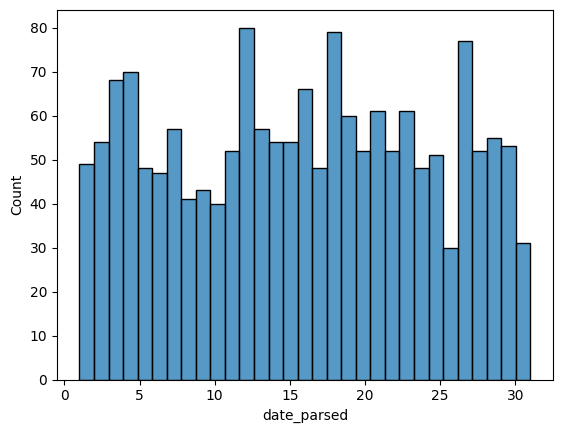

In [17]:
# Loại bỏ các giá trị NA
day_of_month_landslides = day_of_month_landslides.dropna()

# Vẽ biểu đồ ngày trong tháng
sns.histplot(day_of_month_landslides, kde=False, bins=31);

Đúng vậy, có vẻ như chúng ta đã phân tích ngày tháng đúng cách và biểu đồ này có ý nghĩa hợp lý với tôi.

## Your turn

Write code to [**parse the dates**](https://www.kaggle.com/kernels/fork/10824403) in a dataset of worldwide earthquakes.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/data-cleaning/discussion) to chat with other learners.*